## 1.  Descripción del dataset:

El dataset que se utilizará se refiere a un conjunto de datos sobre enfermedades cardíacas. Específicamente, el dataset se utilizará para predecir la presencia o ausencia de una enfermedad cardíaca en un paciente, basado en varias características clínicas y resultados de exámenes.

### Descripción General del Dataset:

**Objetivo**: El objetivo principal del dataset es realizar una clasificación para predecir la variable objetivo `num`, que indica la presencia de una enfermedad cardíaca.

- **`num`**: Es la variable objetivo (target) que codifica el diagnóstico de la enfermedad cardíaca. Tiene un valor entero de 0 (sin presencia) a 4. Los experimentos con la base de datos de Cleveland se han concentrado simplemente en intentar distinguir la presencia (valores 1, 2, 3, 4) de la ausencia (valor 0).

### Características del Dataset:

El dataset contiene tanto características numéricas como categóricas que se utilizan como predictores:

#### Características Numéricas:

- **`age`**: Edad del paciente (en años).
- **`trestbps`**: Presión arterial en reposo (en mm Hg) al momento del ingreso al hospital.
- **`chol`**: Nivel de colesterol sérico (en mg/dl).
- **`thalach`**: Frecuencia cardíaca máxima alcanzada.
- **`oldpeak`**: Depresión del ST inducida por el ejercicio en relación al reposo.
- **`ca`**: Número de vasos principales (0-3) coloreados por fluoroscopia.

#### Características Categóricas:

- **`sex`**: Sexo del paciente (por lo general, codificado como 1 para hombre y 0 para mujer).
- **`cp`**: Tipo de dolor en el pecho (angina típica, angina atípica, dolor no anginal, asintomático).
- **`fbs`**: Azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero; 0 = falso).
- **`restecg`**: Resultados del electrocardiograma en reposo (valores típicos: normal, con anomalías).
- **`exang`**: Angina inducida por el ejercicio (1 = sí; 0 = no).
- **`slope`**: Pendiente del segmento ST del pico del ejercicio.
- **`thal`**: Estado talasémico (3 = normal; 6 = defecto fijo; 7 = defecto reversible).





## 2. Objetivo del Proyecto:

El objetivo de este proyecto es desarrollar y comparar modelos de clasificación para predecir la presencia de enfermedades cardíacas en pacientes utilizando el dataset de enfermedades cardíacas de UCI. Se implementarán y evaluarán cuatro enfoques de clasificación: **Redes Neuronales Profundas**, **Random Forest**, **Máquinas de Soporte Vectorial (SVM)** y **Regresión Logística**.

La comparación entre estos modelos se realizará utilizando diversas métricas de rendimiento, como la **precisión**, la **sensibilidad (recall)**, la **especificidad**, el **F1-score**, y el **Área bajo la curva ROC (AUC-ROC)**. El objetivo final es identificar el modelo que mejor se adapte a este problema de clasificación y ofrezca la mayor capacidad predictiva para la identificación de enfermedades cardíacas en la población analizada.

Se prestará especial atención al preprocesamiento de datos, incluyendo la codificación de variables categóricas, la normalización de características numéricas y la gestión de cualquier desequilibrio en las clases objetivo. Los resultados de esta comparación proporcionarán una base para seleccionar el modelo más adecuado para futuros desarrollos en el diagnóstico predictivo de enfermedades cardíacas.



In [1]:
#Importacion de librerias:   

#se importa la función fetch_ucirepo del módulo ucimlrepo, 
#que es una herramienta para obtener datasets del repositorio de UCI Machine Learning.

from ucimlrepo import fetch_ucirepo 
  
# Se descarga el dataset del repocitorio UCI con el identificador =45
heart_disease = fetch_ucirepo(id=45) 
  
# Se obtienen las caracteristicas almacenadas en un dataframe de pandas X 
X = heart_disease.data.features 

#Se obtienen las etiquetas en un Dataframe de pandas y
y = heart_disease.data.targets 


import pandas as pd

y_df = pd.DataFrame(y)

# Se une X y y en un solo DataFrame
dataset = pd.concat([X, y_df], axis=1)

# Ver las primeras filas del dataset
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
# Se obtiene información importante del dataset utilizado, como numero de instancias , de features o caracteristicas
# el tipo de datos en las caracteristicas, última actualización del dataset , entre otros datos.  
heart_disease.metadata




{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

In [3]:

  
# accediendo al atributo variables del objeto heart_disease para conocer información de las caracteristicas y etiquetas  del dataset
heart_disease.variables


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [4]:
# Validando el numero de intancias para cada una de las etiquetas:
y.value_counts(normalize=True)
# en total son 303 instancias 

num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
Name: proportion, dtype: float64

## 3. Análisis exploratorio:

Se llevara a cabo:


1. Análisis de cada variable de manera individual
3. Análisis bivariado entre la caracteristica y la variable objetivo 


### 3.1  Análisis Univariado:

In [5]:
 #Análisis de cada variable de manera individual:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
# Se valida la cantidad de null en el dataset

nan_count=dataset.isnull().sum()
nan_count




age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
# Se observa que los features ca y tall  contienen algunos datos vacios , por tanto se procede a eliminar daros en na.

dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
#Extraer algunas variables estadísticas descriptivas básicas

dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


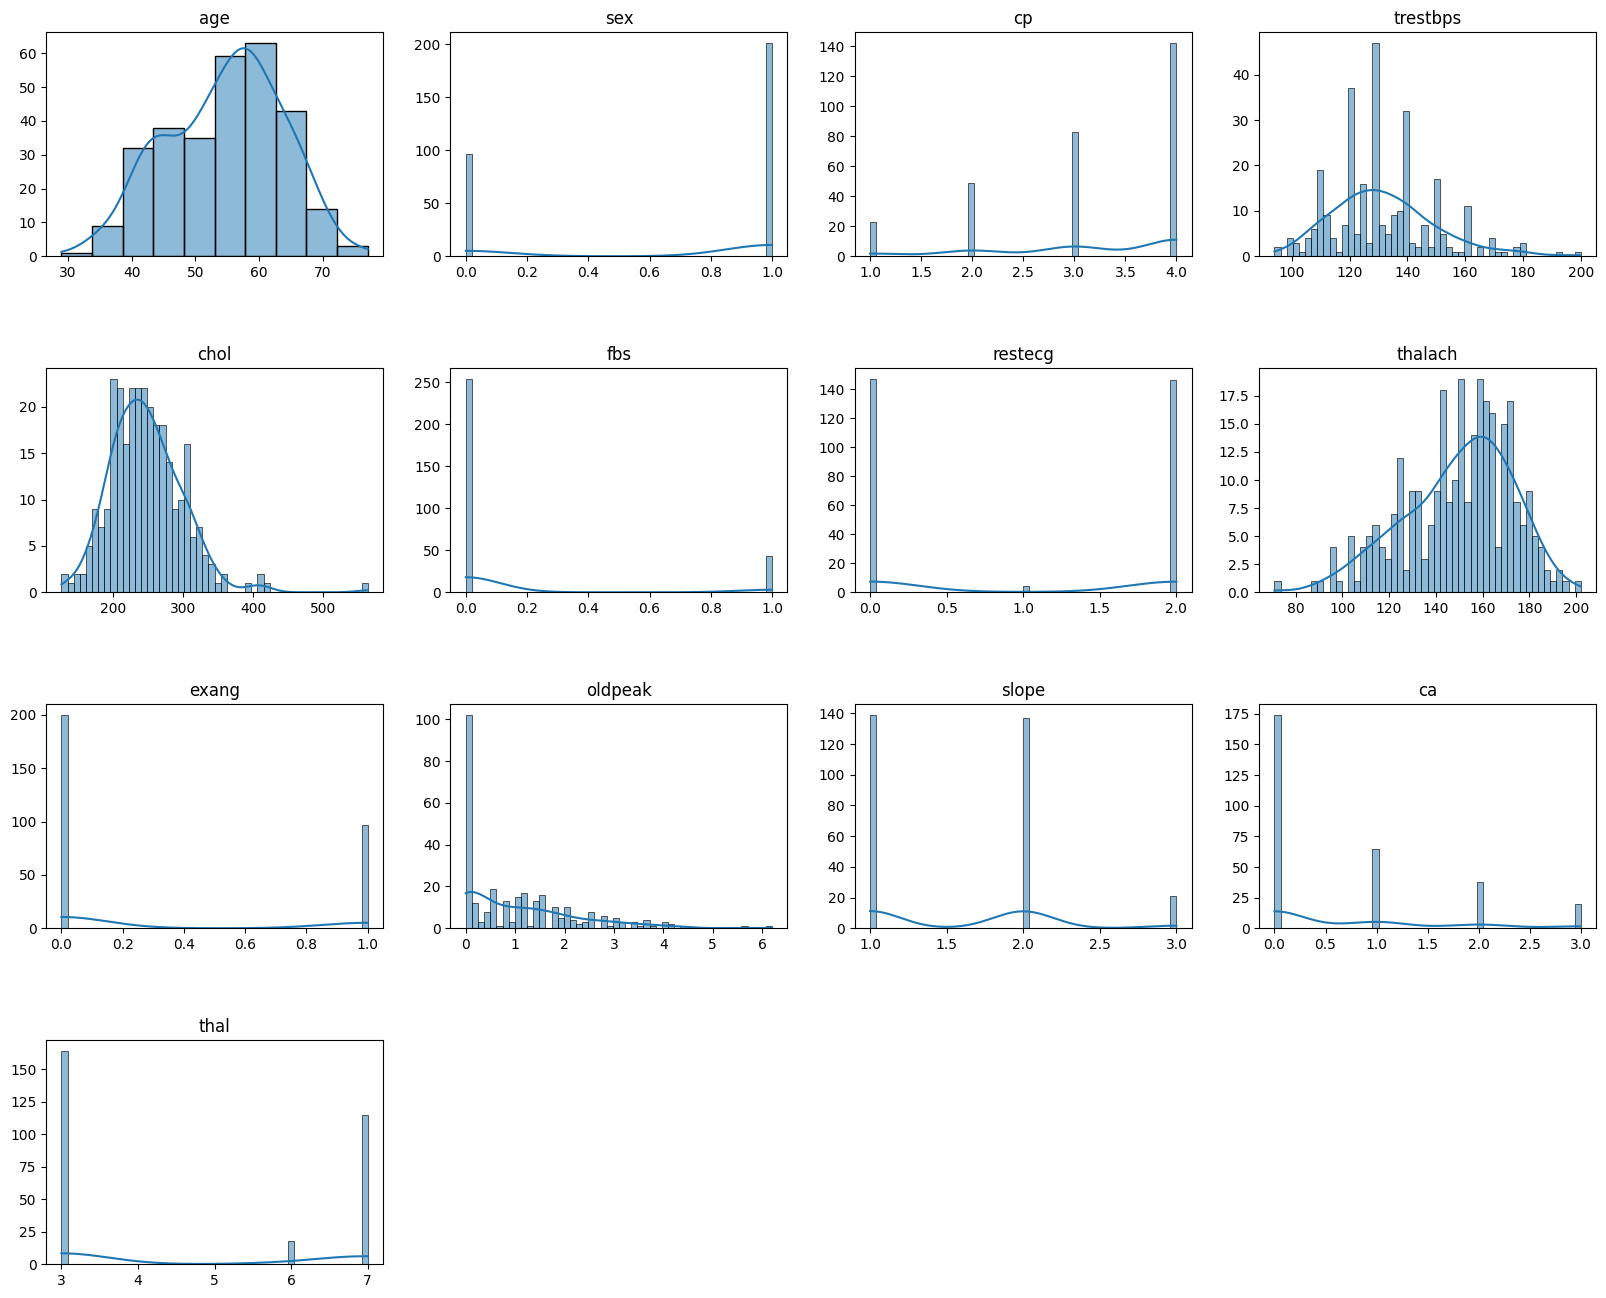

In [10]:
#histogramas:
import matplotlib.pyplot as plt
import seaborn as sns

col_num = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Ajustar el número de filas y columnas según el número de características
n = len(col_num)
ncols = 4  # Número de columnas para los subplots
nrows = (n + ncols - 1) // ncols  # Número de filas para acomodar todas las características

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
fig.subplots_adjust(hspace=0.5)

# Convertir a una lista de ejes en caso de múltiples filas y columnas
ax = ax.flatten()

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=dataset, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Ocultar los ejes vacíos si hay menos datos que subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.show()


#Como se evidencia existen algunas columnas numericas pero codificadas, por tanto se estudiara estas caracteristicas con graficos de barras




### 3.1.1 Análisi univariado para variables categoricas:

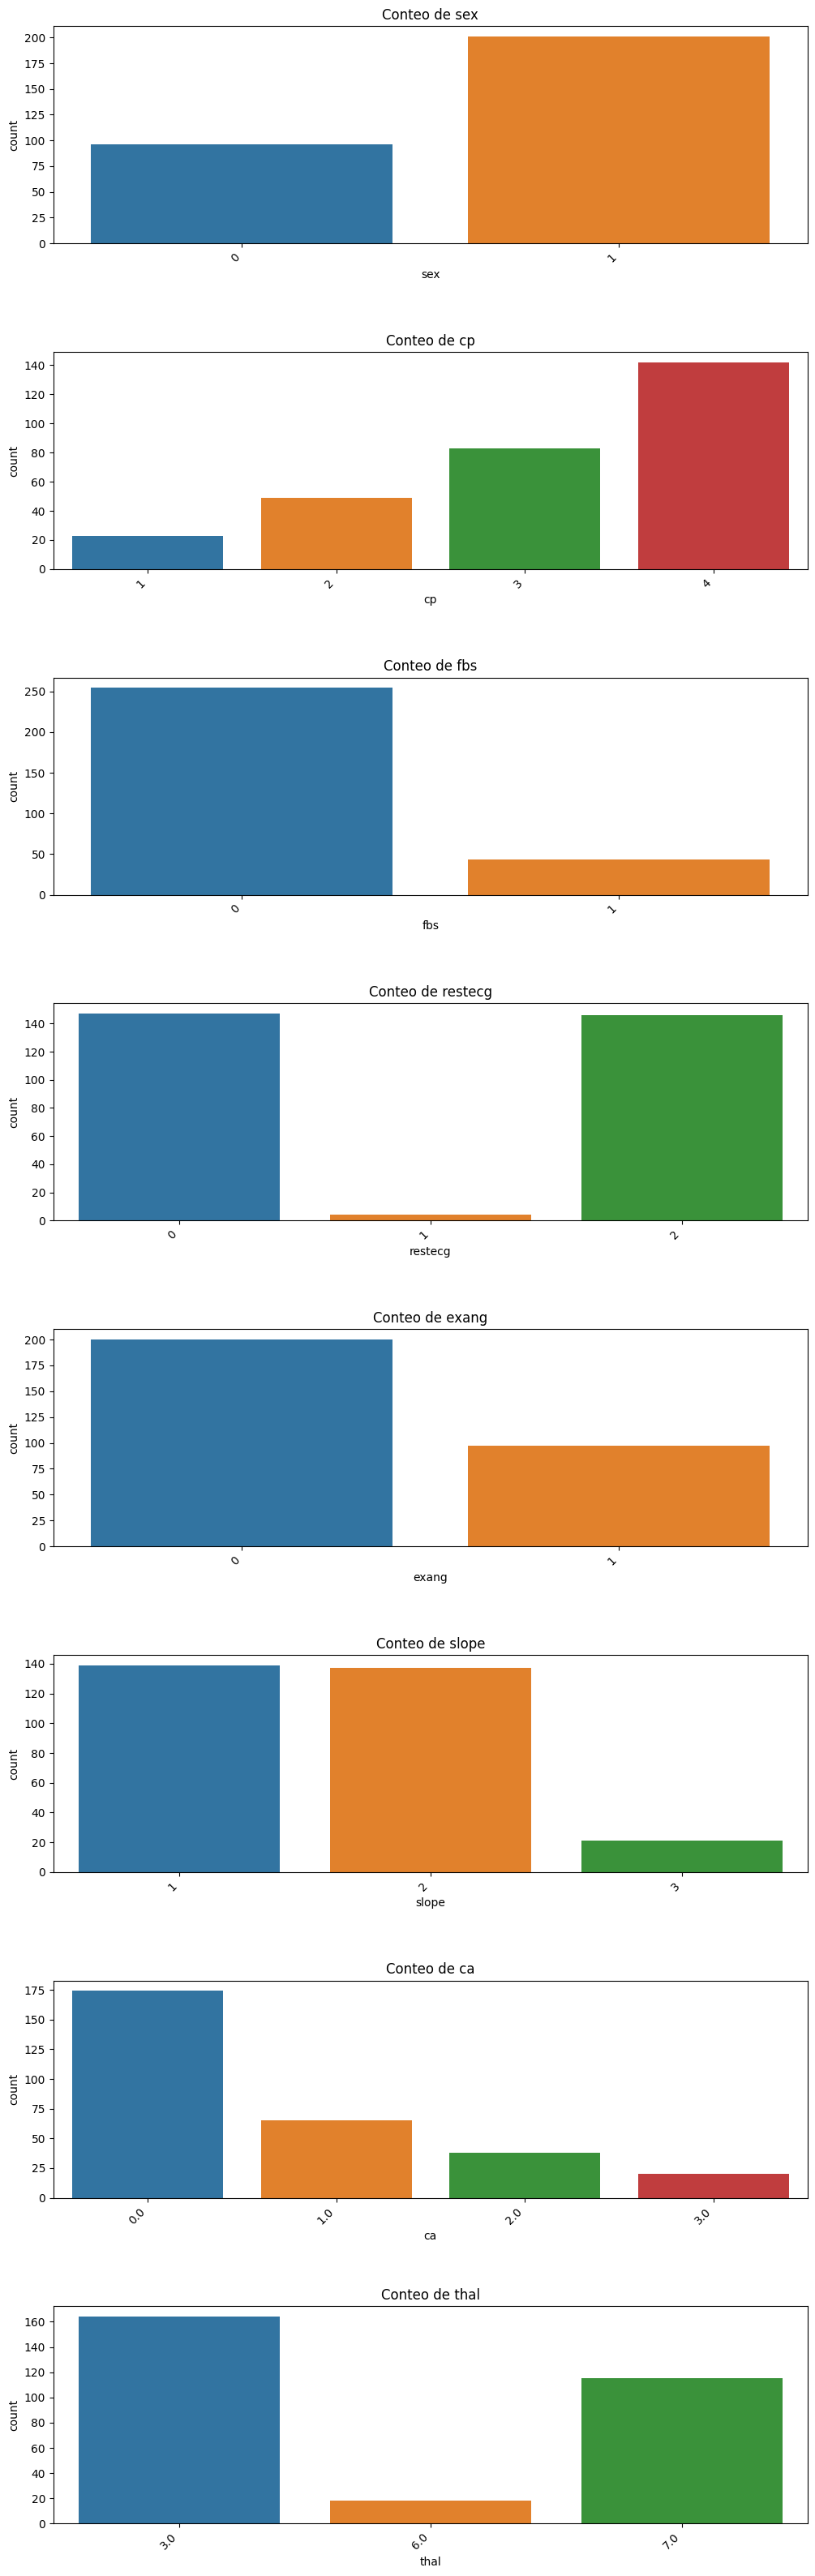

In [11]:

# Lista de columnas categóricas codificadas
col_cod = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cod), ncols=1, figsize=(12, len(col_cod) * 5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cod):
    sns.countplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(f'Conteo de {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')  # Ajustar la rotación y alineación de las etiquetas

plt.show()

##  3.2 Análisis Bivariado:

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras (age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal) y la variable a predecir ('y').

### 3.2.1 Análisis bivariado para caracteristicas categoricas:

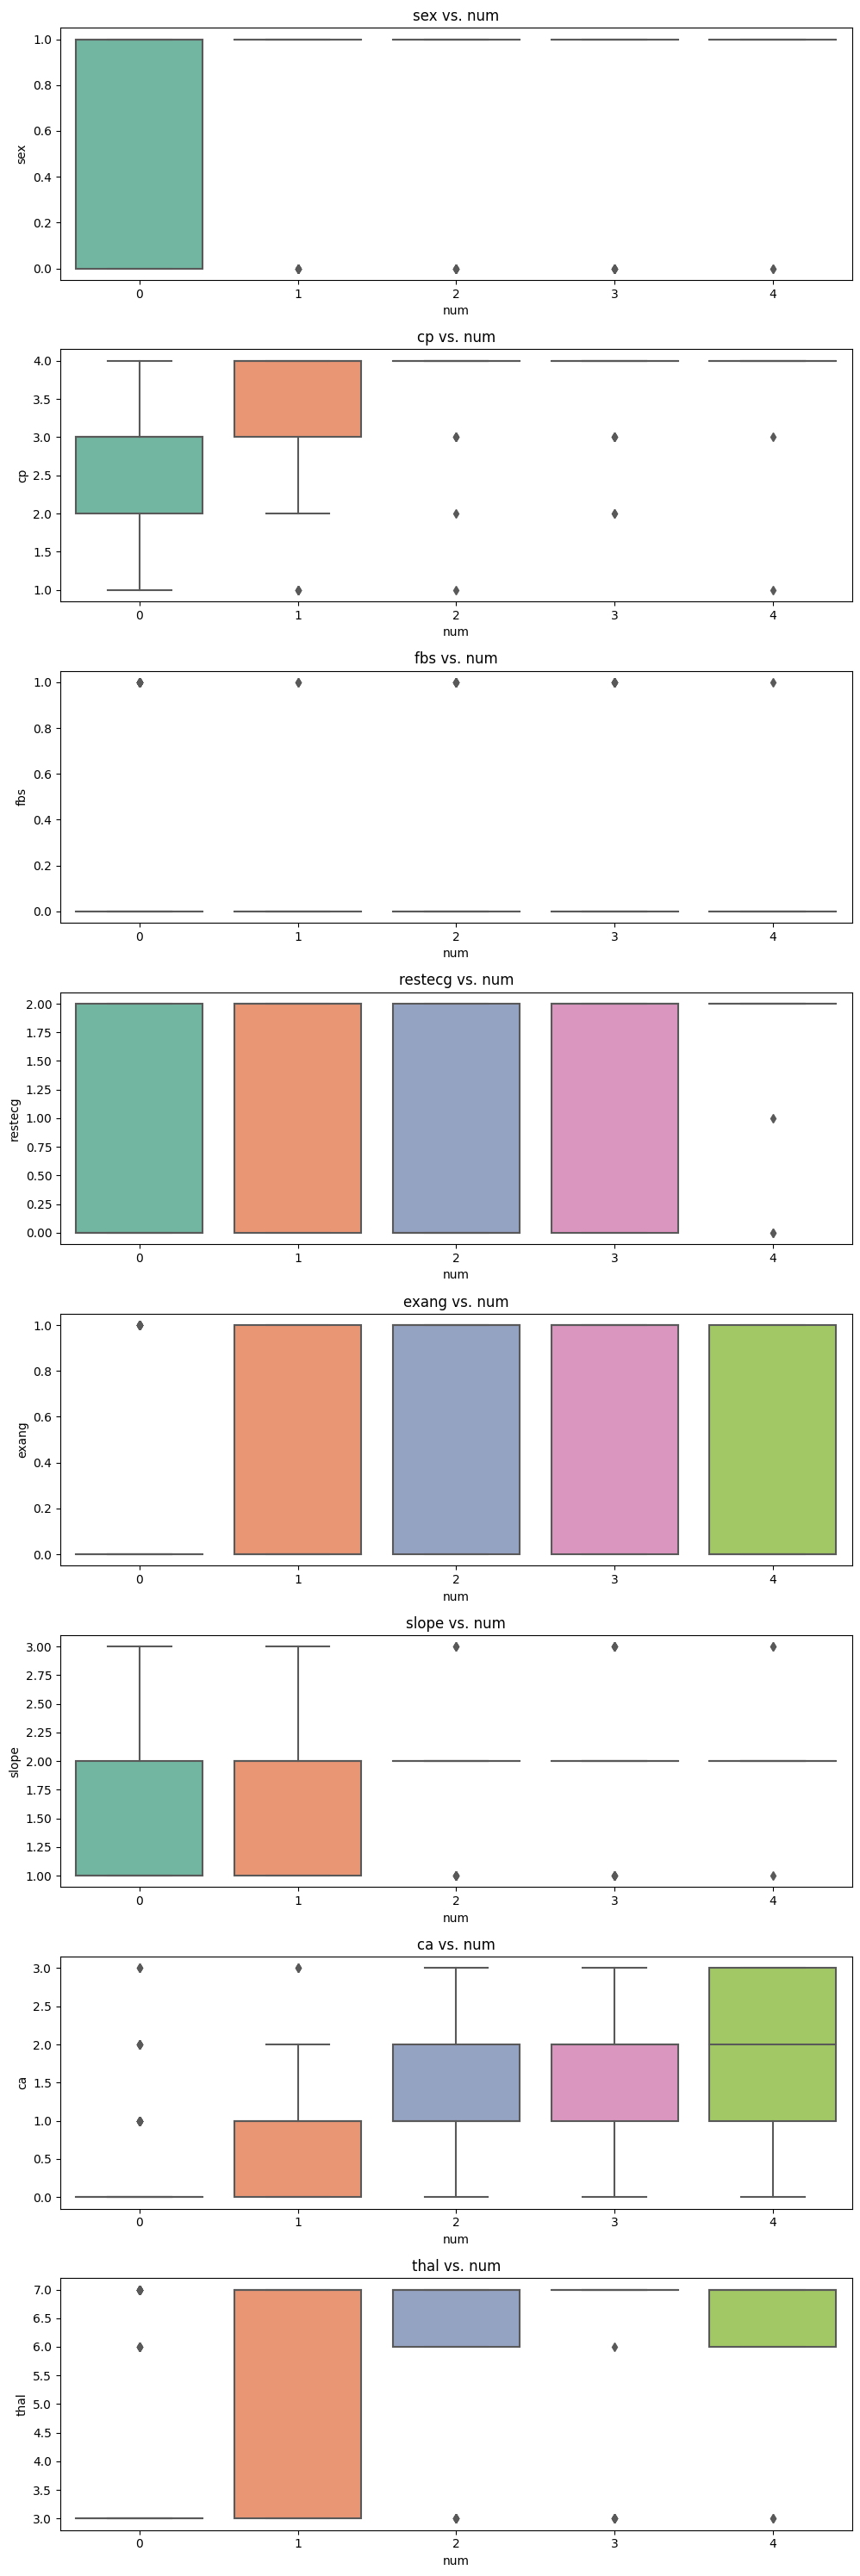

In [12]:
# Boxplots para observar la distribución de características categóricas respecto a la variable objetivo
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, ax = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(10, 30))
for i, feature in enumerate(cat_features):
    sns.boxplot(x='num', y=feature, data=dataset, ax=ax[i], palette='Set2')
    ax[i].set_title(f'{feature} vs. num')
plt.tight_layout()
plt.show()

# Resumen del Análisis de las Gráficas

A continuación se presentan las conclusiones clave obtenidas de las seis gráficas que muestran la relación entre varias características del dataset y la variable objetivo `num` (indicador de la presencia de enfermedad cardíaca).

## Gráfica 1: sex vs. num
**Observación:**  
La mayoría de los pacientes en las categorías de `num = 0` y `num = 1` son de sexo masculino (`sex = 1`). En las categorías de mayor riesgo cardíaco (`num 2-4`), el sexo masculino también domina.  
**Conclusión:**  
El sexo parece ser una característica relevante, con una mayor prevalencia de enfermedad cardíaca en hombres que en mujeres.

## Gráfica 2: cp (tipo de dolor en el pecho) vs. num
**Observación:**  
Se observa una tendencia de que pacientes con mayor `num` (mayor riesgo cardíaco) tienden a tener valores más altos en `cp`, lo que sugiere un tipo de dolor de pecho más anginoso.  
**Conclusión:**  
Los tipos de dolor en el pecho más severos están asociados con un mayor riesgo de enfermedad cardíaca.

## Gráfica 3: fbs (nivel de azúcar en sangre en ayunas) vs. num
**Observación:**  
La mayoría de los pacientes tienen niveles normales de azúcar en sangre (`fbs = 0`), independientemente de su nivel de riesgo cardíaco. Se observan algunos valores atípicos (`fbs = 1`) en la categoría `num = 2`.  
**Conclusión:**  
No parece haber una relación significativa entre el nivel de azúcar en sangre en ayunas y la presencia de enfermedad cardíaca en este dataset.

## Gráfica 4: restecg (resultados del electrocardiograma) vs. num
**Observación:**  
Los valores de `restecg` se distribuyen uniformemente en todas las categorías de `num`. La mayoría de los pacientes tienen resultados normales o leves en sus electrocardiogramas.  
**Conclusión:**  
No parece haber una relación fuerte entre los resultados del electrocardiograma y el nivel de riesgo cardíaco.

## Gráfica 5: exang (angina inducida por el ejercicio) vs. num
**Observación:**  
Un mayor número de pacientes con valores altos de `num` (riesgo cardíaco) experimentan `exang` (angina inducida por el ejercicio). En las categorías de `num` más bajas, no se observa angina inducida.  
**Conclusión:**  
La presencia de angina inducida por el ejercicio está fuertemente asociada con un mayor riesgo de enfermedad cardíaca.

## Gráfica 6: slope (pendiente del segmento ST) vs. num
**Observación:**  
En los pacientes con menor riesgo cardíaco (`num = 0`), la pendiente del segmento ST tiende a ser más baja. Los pacientes en las categorías de `num` más altas muestran una mayor variación en `slope`.  
**Conclusión:**  
La pendiente del segmento ST parece estar relacionada con la gravedad del riesgo cardíaco, siendo más pronunciada en pacientes con mayor riesgo.

## Gráfica 7: ca (número de vasos principales que están calcificados) vs num
**Observación:**  
Se observa una tendencia clara: los pacientes con mayor `num` (mayor severidad de la enfermedad cardíaca) tienden a tener valores más altos de `ca`. Por ejemplo, los pacientes con `num = 0` tienen un valor de `ca = 0`, mientras que aquellos con `num` más alto tienen valores de `ca` más dispersos y elevados.

## Gráfica 8: thal (talasemia) vs num
**Observación:**  
En la gráfica de `thal` (talasemia) frente a `num`, se ve que diferentes niveles de talasemia (`thal = 1, 6, 7`) están presentes a diferentes niveles de `num`.  
Es notable que `thal = 6` parece estar fuertemente asociado con `num = 1` (enfermedad leve), mientras que otros valores de `thal` aparecen en los niveles más graves de `num`.

## Conclusión general:
De acuerdo a estos resultados, se realizara un análisis estadistico de correlación para variales categoricas con el proposito de dfinir si las caracteristicas `fbs` y `restecg` del dataset debido  realmente no cuentan con una  relación significativa con la variable objetivo `num`. 


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import numpy as np

# Se procede a realizar la medida de asociación Cramer´s V , la cual mide la fuerza de la asociación entre dos variables categóricaas , con resultado 0 y 1 con 1 una asociación perfecta. 

# Lista de columnas categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


def cramers_v(contingency_table):
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Número total de observaciones
    return np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# DataFrame para almacenar los resultados de Cramér's V
cramersv_results = pd.DataFrame(columns=['Variable', "Cramér's V"])

# Calcular Cramér's V para cada variable categórica
for column in categorical_columns:
    # Crear la tabla de contingencia entre la característica y la variable objetivo 'num'
    contingency_table = pd.crosstab(dataset[column], dataset['num'])
    
    # Calcular Cramér's V
    cramer_v_value = cramers_v(contingency_table)
    
    # Guardar los resultados en el DataFrame usando pd.concat()
    new_row = pd.DataFrame({'Variable': [column], "Cramér's V": [cramer_v_value]})
    cramersv_results = pd.concat([cramersv_results, new_row], ignore_index=True)

print("\nResultados de Cramér's V:")
print(cramersv_results)


Resultados de Cramér's V:
  Variable  Cramér's V
0      sex    0.279725
1       cp    0.308072
2      fbs    0.163361
3  restecg    0.181933
4    exang    0.442262
5    slope    0.301211
6       ca    0.352473
7     thal    0.404877


### Análisis de los resultados:

- **exang (0.44)**: Tiene la asociación más fuerte con la variable objetivo, lo que sugiere que esta variable tiene una relación considerable con `num` ( variable objetivo).
- **thal (0.404)**: También muestra una asociación relativamente fuerte con la variable objetivo, por lo que es importante en el modelo.
- **ca (0.350)**: Tiene una asociación moderada, lo que indica que es relevante para el modelo.
- **cp (0.30)** y **slope (0.30)**: Ambas muestran asociaciones moderadas, lo que sugiere que son útiles, pero menos fuertes que las anteriores.
- **sex (0.279)**: Muestra una asociación algo menor, pero sigue siendo relevante.
- **restecg (0.181)** y **fbs (0.163)**: Estas variables tienen la asociación más baja, por lo que su relación con la variable objetivo es débil.


Se corrobora que las variables *restecg y fbs no tienen una asociación relevante con la variable objetivo , por tanto se procede a eliminarlas del modelo. 

In [14]:
#Eliminando restecg y fbs del dataset
dataset=dataset.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']]

### 3.2.2 Análisis bivariado para caracteristicas numéricas:

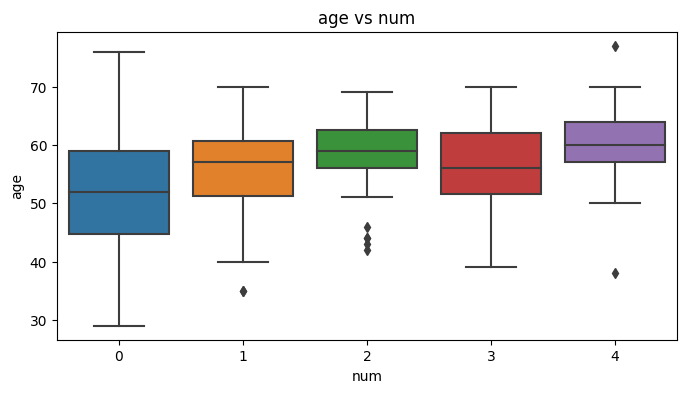

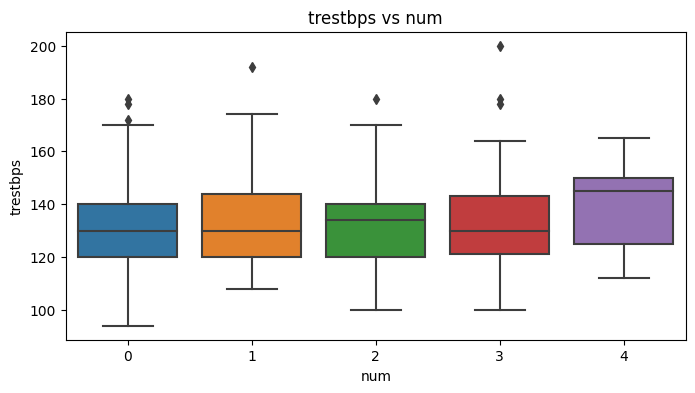

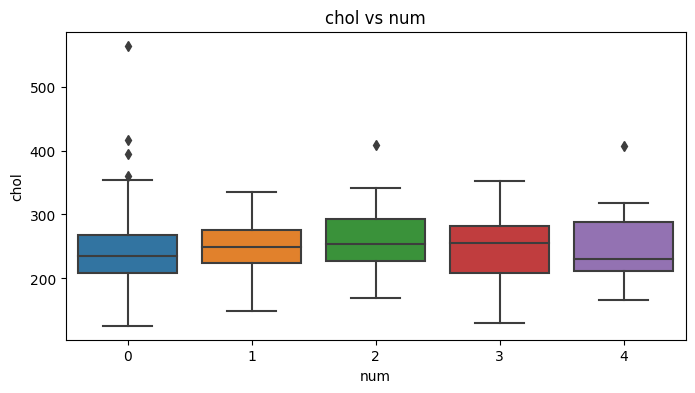

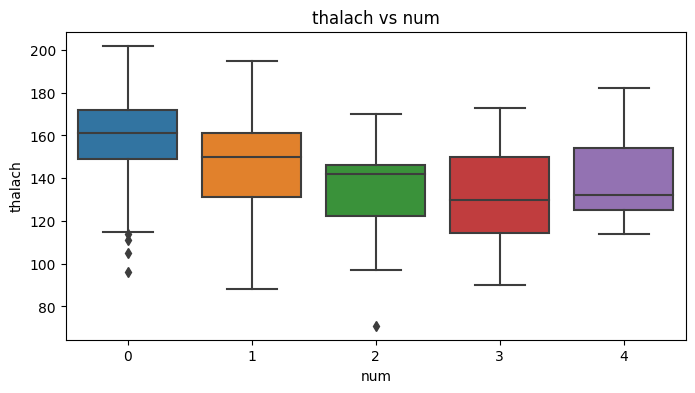

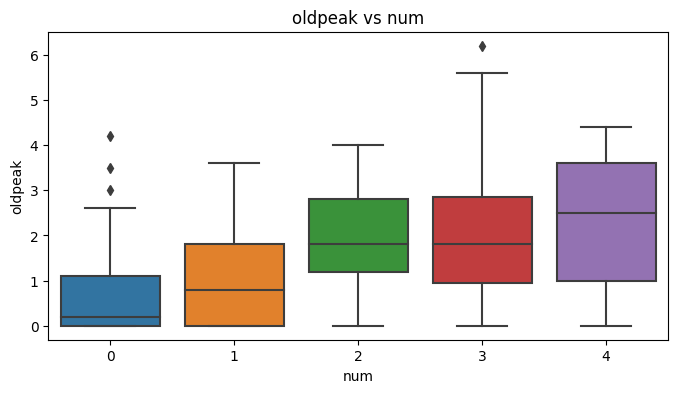

In [15]:
#Analisis  para las caracteristicas numericas : 

import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='num', y=var, data=dataset)
    plt.title(f'{var} vs num')
    plt.show()


## Resultados

# Age vs Num:
La variable "age" muestra que la mediana de la edad varía entre las diferentes clases de la variable objetivo "num".  
Los pacientes sin enfermedad cardíaca (num = 0) tienen una edad promedio ligeramente menor en comparación con los pacientes con algún grado de enfermedad (num > 0).  
Las clases 1, 2, 3 y 4 tienen medianas de edad bastante similares, alrededor de los 55-60 años, con algunos valores atípicos (outliers) más bajos y más altos, especialmente en las clases 0 y 2.

## Trestbps vs Num:
La variable "trestbps" (presión arterial en reposo) muestra menos variación entre las diferentes clases de la variable objetivo "num".  
Las medianas para la presión arterial están bastante cercanas entre todas las clases, alrededor de 130-140 mm Hg, aunque las clases con enfermedad cardíaca (num > 0) parecen tener una ligera tendencia hacia presiones arteriales más altas.  
Los valores atípicos están presentes en todas las clases, sugiriendo que algunos pacientes tienen niveles de presión arterial muy altos independientemente de su nivel de enfermedad cardíaca.

## Chol vs Num:
La variable "chol" (colesterol) muestra poca variación entre las clases de la variable objetivo "num".  
La mediana del colesterol está en un rango similar (alrededor de 230 mg/dL) para todas las clases.  
Los valores atípicos (outliers) son más comunes en los pacientes sin enfermedad cardíaca (num = 0), pero no parece haber una tendencia clara de aumento del colesterol con el nivel de enfermedad cardíaca.

## Thalach vs Num:
La variable "thalach" (frecuencia cardíaca máxima alcanzada) muestra una clara disminución en la mediana conforme aumenta el valor de "num".  
Los pacientes sin enfermedad cardíaca (num = 0) tienden a tener una frecuencia cardíaca máxima más alta en comparación con aquellos con enfermedad cardíaca (num > 0).  
Las clases de enfermedad cardíaca más avanzada (num = 2, 3, 4) tienen frecuencias cardíacas medianas más bajas.

## Oldpeak vs Num:
La variable "oldpeak" (depresión del segmento ST) muestra una clara tendencia de aumento con el incremento del valor de "num".  
Los pacientes sin enfermedad cardíaca (num = 0) tienen una me.0diana cercana a 0, mientras que los pacientes con enfermedad cardíaca tienen valores más altos, especialmente en las clases 3 y 4.  
Los valores atípicos son más notables en la clase 0 y 2, pero la tendencia general es que la depresión ST aumenta con la severidad de la enfermedad.

## Resumen del Análisis:
- **Age**: Existe una relación leve; los pacientes mayores tienden a tener enfermedad más severa. Útil para el modelo.
- **Trestbps**: No se observa una relación clara con "num". Poco útil para el modelo.
- **Chol**: No muestra una relación significativa con "num". Poco útil para el modelo.
- **Thalach**: Relación inversa con "num", es decir, menor frecuencia cardíaca máxima con mayor severidad. Útil para el modelo.
- **Oldpeak**: Relación clara con "num", a mayor "oldpeak", mayor severidad de la enfermedad. Útil para el modelo.

## Próximo Paso:

Con el propósito de corroborar que es conveniente eliminar las variables  **trestbps**  y **chol**  se realizara a continuación un  test de normalidad y asi validar si es conveniente realizar un análisis de varianza (ANOVA) o un test no patametrico como kruskall wallis teniendo en cuenta con son cinco grupos que se evaluarioan (Clases 0,1,2,3 y 4 de la variable num). COn base en este análisis se determinar si existe difetnecias significativas entre la disribuciones en el conjunto de datos de las variables numericas frente a cada uno de los grupos o clases de la variable objetivo NUM. 


In [16]:
# Test de Shapiro-Wilk:  evalúa si los datos en cada grupo se distribuyen de manera normal. 

# Si el valor P es mayor que 0.05, se asume que los datos son normales.

from scipy.stats import shapiro

variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in variables:
    for categoria in dataset['num'].unique():
        stat, p = shapiro(dataset[dataset['num'] == categoria][var])
        print(f'{var} (num = {categoria}): W = {stat}, p-value = {p}')


#Resultado:

'''Variables como age, trestbps, chol, thalach y oldpeak en muchos grupos no siguen una distribución normal (p < 0.05 en varios casos),
 lo que indica que no se puede asumir normalidad en estos casos.
oldpeak y thalach parecen ser especialmente no normales en varios grupos de num.


Dado que muchas de estas variables no cumplen con la suposición de normalidad, se utilizara acontinuacion la prueba no parametrica de Kruskal-Wallis 
para comparar la relación entre las variables numéricas y la variable objetivo num. En caso de haber existido solo dos grupos (0 y 1) solo seria necesario utilziar la prueba de Mann-Whitney  y de esta manera
comparar si existen diferencias significativas entre las distribuciones de los grupos

age:
num = 0: p = 0.111 → Normal.
num = 1: p = 0.012 → No normal.
num = 2: p = 0.007 → No normal.
num = 3: p = 0.716 → Normal.
num = 4: p = 0.655 → Normal.
trestbps:
num = 0: p = 0.011 → No normal.
num = 1: p = 0.008 → No normal.
num = 2: p = 0.179 → Normal.
num = 3: p = 0.011 → No normal.
num = 4: p = 0.481 → Normal.
chol:
num = 0: p ≈ 0.000 → No normal.
num = 1: p = 0.991 → Normal.
num = 2: p = 0.613 → Normal.
num = 3: p = 0.938 → Normal.
num = 4: p = 0.349 → Normal.
thalach:
num = 0: p = 0.001 → No normal.
num = 1: p = 0.241 → Normal.
num = 2: p = 0.027 → No normal.
num = 3: p = 0.464 → Normal.
num = 4: p = 0.295 → Normal.
oldpeak:
num = 0: p ≈ 0.000 → No normal.
num = 1: p = 0.000 → No normal.
num = 2: p = 0.099 → Normal.
num = 3: p = 0.025 → No normal.
num = 4: p = 0.607 → Normal.

'''

age (num = 0): W = 0.9860920310020447, p-value = 0.11104635894298553
age (num = 2): W = 0.9098141193389893, p-value = 0.007336803711950779
age (num = 1): W = 0.9430356025695801, p-value = 0.012499617412686348
age (num = 3): W = 0.9786981344223022, p-value = 0.7163398265838623
age (num = 4): W = 0.9537205100059509, p-value = 0.6555686593055725
trestbps (num = 0): W = 0.9779676198959351, p-value = 0.011681037954986095
trestbps (num = 2): W = 0.9565531015396118, p-value = 0.1798839569091797
trestbps (num = 1): W = 0.9391455054283142, p-value = 0.008587656542658806
trestbps (num = 3): W = 0.9164199829101562, p-value = 0.011258026584982872
trestbps (num = 4): W = 0.9418738484382629, p-value = 0.48162123560905457
chol (num = 0): W = 0.8986683487892151, p-value = 4.779216133954378e-09
chol (num = 2): W = 0.9755930304527283, p-value = 0.6133097410202026
chol (num = 1): W = 0.9933726787567139, p-value = 0.9910371899604797
chol (num = 3): W = 0.9865942001342773, p-value = 0.9380631446838379
chol

'Variables como age, trestbps, chol, thalach y oldpeak en muchos grupos no siguen una distribución normal (p < 0.05 en varios casos),\n lo que indica que no se puede asumir normalidad en estos casos.\noldpeak y thalach parecen ser especialmente no normales en varios grupos de num.\n\n\nDado que muchas de estas variables no cumplen con la suposición de normalidad, se utilizara acontinuacion la prueba no parametrica de Kruskal-Wallis \npara comparar la relación entre las variables numéricas y la variable objetivo num. En caso de haber existido solo dos grupos (0 y 1) solo seria necesario utilziar la prueba de Mann-Whitney  y de esta manera\ncomparar si existen diferencias significativas entre las distribuciones de los grupos\n\nage:\nnum = 0: p = 0.111 → Normal.\nnum = 1: p = 0.012 → No normal.\nnum = 2: p = 0.007 → No normal.\nnum = 3: p = 0.716 → Normal.\nnum = 4: p = 0.655 → Normal.\ntrestbps:\nnum = 0: p = 0.011 → No normal.\nnum = 1: p = 0.008 → No normal.\nnum = 2: p = 0.179 → Norm

In [17]:

#kruskal Wallis:

#Criterio de seleccion:Un P-valor bajo (< 0.05) indica que la variable tiene una diferencia significativa entre las clases de num y por lo tanto ser relevante para el modelo.

# la pregunta que resuelve¿Cambia el valor promedio de las variables numéricas (age, trestbps, etc.) cuando varía la clase de num?


'''

Hipótesis nula (H₀): Todas las muestras tienen la misma distribución (no hay diferencias significativas entre los grupos).
Hipótesis alternativa (H₁): Al menos una de las muestras proviene de una distribución diferente (hay diferencias significativas entre los grupos)'''

from scipy.stats import kruskal

for var in variables:
    h_val, p_val = kruskal(dataset[dataset['num'] == 0][var],
                           dataset[dataset['num'] == 1][var],
                           dataset[dataset['num'] == 2][var],
                           dataset[dataset['num'] == 3][var],
                           dataset[dataset['num'] == 4][var])
    print(f'{var}: H-value = {h_val}, P-value = {p_val}')



age: H-value = 20.598718202030213, P-value = 0.0003802760606405041
trestbps: H-value = 6.646136750822118, P-value = 0.155812338657077
chol: H-value = 5.013335304843184, P-value = 0.2859319445287999
thalach: H-value = 62.91816430920229, P-value = 7.060418587839061e-13
oldpeak: H-value = 66.37766806027076, P-value = 1.318732804874194e-13


### Resultados pruebas de kruskall wallis:

age: H = 20.60, P = 0.00038 → Hay una diferencia significativa entre las clases de num. Esta variable es relevante para el modelo.
trestbps: H = 6.65, P = 0.156 → No hay una diferencia significativa. Esta variable no sería relevante para el modelo.
chol: H = 5.01, P = 0.286 → No hay una diferencia significativa. Esta variable no sería relevante para el modelo.
thalach: H = 62.92, P < 0.001 → Hay una diferencia altamente significativa entre las clases de num. Esta variable es muy relevante para el modelo.
oldpeak: H = 66.38, P < 0.001 → Hay una diferencia altamente significativa entre las clases de num. Esta variable es muy relevante para el modelo.

De acuerdo a estos resultados se decide elimianr unicamente la variable **chol** cn el valor p más alto.

In [18]:
# Eliminando la variable chol del dataset

dataset=dataset.loc[:,['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']]

In [19]:
dataset.head(20)

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,155,1,3.1,3,0.0,7.0,1


In [20]:
dataset['num'] = dataset['num'].astype(int)

## 4. Pre-procesamiento del modelo:

In [21]:
dataset.describe(include='all')

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Algunas de las variables numéricas tienen rangos diferentes, como age que va de 29 a 77, y oldpeak que va de 0 a 6.2. Para modelos los modelos de clasificación, es importante estandarizar las características a un rango similar para mejorar la convergencia durante el entrenamiento. Por tanto se realizara un escalamiendo con StandardScaler para ajusta los datos para que tengan media 0 y desviación estándar  de mis variables numericas con un rango continuo :'age','trestbps','thalach' y 'oldpeak'.


### 4.1 Escalamiento de variables numericas con StandardScaler:



In [22]:

from sklearn.preprocessing import StandardScaler

# Variables numéricas continuas
num_vars = ['age', 'trestbps', 'thalach', 'oldpeak']

# Escalador
scaler = StandardScaler()

# Escalar solo las variables numéricas continuas
dataset[num_vars] = scaler.fit_transform(dataset[num_vars])


### 4.2 Codificación para variables categoricas dicretas con OneHotEncoder:



Variables que requieren codificacion:

- **'sex' (0, 1)**: Es una variable binaria (0 = mujer, 1 = hombre), por lo que no necesita codificación adicional.
- **'cp' (1, 2, 3, 4)**: Tipo de dolor torácico (una variable ordinal o nominal).
- **'exang' (0, 1)**: Angina inducida por el ejercicio (otra variable binaria).
- **'slope' (1, 2, 3)**: Inclinación del segmento ST, que puede ser tratada como ordinal.
- **'ca' (0, 1, 2, 3)**: Número de vasos coloreados por fluoroscopia.
- **'thal' (3, 6, 7)**: Tipo de defecto talámico.

In [23]:

from sklearn.preprocessing import OneHotEncoder

# Variables categóricas a codificar
categoricas_vars = ['cp', 'thal', 'slope', 'ca']

# OneHotEncoding
encoder = OneHotEncoder(sparse=False)  # El argumento drop='first' elimina la primera categoría de cada variable codificada. Esta técnica se usa para evitar la multicolinealidad, que ocurre cuando las variables codificadas son linealmente dependientes (una puede predecirse a partir de las otras). Al eliminar una categoría, se evita este problema sin perder información.
encoded_vars = encoder.fit_transform(dataset[categoricas_vars])

# Convertir el resultado a DataFrame y concatenar con el dataset original
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(categoricas_vars))
dataset = pd.concat([dataset, encoded_df], axis=1).drop(columns=categoricas_vars)

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
dataset

,age,sex,trestbps,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,...,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,0.936181,1.0,0.750380,0.017494,0.0,1.068965,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.378929,1.0,1.596266,-1.816334,1.0,0.381773,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.378929,1.0,-0.659431,-0.899420,1.0,1.326662,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.941680,1.0,-0.095506,1.633010,0.0,2.099753,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.498933,0.0,-0.095506,0.978071,0.0,0.295874,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
dataset.isnull().sum()

age         5
sex         5
trestbps    5
thalach     5
exang       5
oldpeak     5
num         5
cp_1        5
cp_2        5
cp_3        5
cp_4        5
thal_3.0    5
thal_6.0    5
thal_7.0    5
slope_1     5
slope_2     5
slope_3     5
ca_0.0      5
ca_1.0      5
ca_2.0      5
ca_3.0      5
dtype: int64

In [26]:
# se imputan los valores faltantes con la media de cada columna del dataset:

dataset.fillna(dataset.mean(),inplace=True)

In [27]:
dataset.isnull().sum()

age         0
sex         0
trestbps    0
thalach     0
exang       0
oldpeak     0
num         0
cp_1        0
cp_2        0
cp_3        0
cp_4        0
thal_3.0    0
thal_6.0    0
thal_7.0    0
slope_1     0
slope_2     0
slope_3     0
ca_0.0      0
ca_1.0      0
ca_2.0      0
ca_3.0      0
dtype: int64

In [28]:
dataset.head(10)

,age,sex,trestbps,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,...,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,0.936181,1.0,0.750380,0.017494,0.0,1.068965,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.378929,1.0,1.596266,-1.816334,1.0,0.381773,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.378929,1.0,-0.659431,-0.899420,1.0,1.326662,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.941680,1.0,-0.095506,1.633010,0.0,2.099753,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.498933,0.0,-0.095506,0.978071,0.0,0.295874,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.161372,1.0,-0.659431,1.240047,0.0,-0.219520,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.825494,0.0,0.468418,0.454120,0.0,2.185652,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.272059,0.0,-0.659431,0.585108,1.0,-0.391318,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.936181,1.0,-0.095506,-0.113493,0.0,0.295874,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,-0.170689,1.0,0.468418,0.235807,1.0,1.756157,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [29]:
dataset.describe()

,age,sex,trestbps,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,...,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0
count,3.020000e+02,302.000000,3.020000e+02,3.020000e+02,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-1.249920e-16,0.676768,4.823221e-16,4.705581e-16,0.326599,0.000000,0.946128,0.077441,0.164983,0.279461,...,0.552189,0.060606,0.387205,0.468013,0.461279,0.070707,0.585859,0.218855,0.127946,0.067340
std,9.933333e-01,0.464592,9.933333e-01,9.933333e-01,0.465843,0.993333,1.224254,0.265508,0.368691,0.445743,...,0.493954,0.237016,0.483864,0.495649,0.495175,0.254626,0.489289,0.410714,0.331803,0.248939
min,-2.827176e+00,0.000000,-2.125634e+00,-3.431849e+00,0.000000,-0.906712,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.241238e-01,0.000000,-6.594306e-01,-6.592755e-01,0.000000,-0.906712,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060284e-01,1.000000,-9.550637e-02,1.048196e-01,0.000000,-0.219520,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.148067e-01,1.000000,4.684179e-01,6.724331e-01,1.000000,0.467672,2.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.485798e+00,1.000000,3.851964e+00,2.287949e+00,1.000000,4.419026,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Generación de particiones (Entrenamiento - validación y prueba):

-  Entramiento: 60%
-  Validación: 20%
-  Prueba: 20%


In [30]:
import numpy as np

dataset.columns


Index(['age', 'sex', 'trestbps', 'thalach', 'exang', 'oldpeak', 'num', 'cp_1',
       'cp_2', 'cp_3', 'cp_4', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'slope_1',
       'slope_2', 'slope_3', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0'],
      dtype='object')

In [31]:
dataset['num'].value_counts(normalize=True)

#Se puedes observar que los datos se encuentran desbalanceados, dado que la mitad de los datos se encuentran en categorizados en la clase 0. Al momento de realizar las particiones
# se debe preservar las proporciones. Esto se logrará  usando `train_test_split` pero usando un **muestreo estratificado**. 
# En este caso simplemente se usará el argumento `stratify = Y` para que al hacer el muestreo la función tenga en cuenta las proporciones presentes en el arreglo `Y`:

num
0.000000    0.529801
1.000000    0.178808
2.000000    0.115894
3.000000    0.115894
4.000000    0.043046
0.946128    0.016556
Name: proportion, dtype: float64

In [32]:

X=dataset.loc[:,['age', 'sex', 'trestbps', 'thalach', 'exang', 'oldpeak','cp_1',
       'cp_2', 'cp_3', 'cp_4', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'slope_1',
       'slope_2', 'slope_3', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0']].to_numpy()




Y=dataset['num'].to_numpy()

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 287
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   trestbps  302 non-null    float64
 3   thalach   302 non-null    float64
 4   exang     302 non-null    float64
 5   oldpeak   302 non-null    float64
 6   num       302 non-null    float64
 7   cp_1      302 non-null    float64
 8   cp_2      302 non-null    float64
 9   cp_3      302 non-null    float64
 10  cp_4      302 non-null    float64
 11  thal_3.0  302 non-null    float64
 12  thal_6.0  302 non-null    float64
 13  thal_7.0  302 non-null    float64
 14  slope_1   302 non-null    float64
 15  slope_2   302 non-null    float64
 16  slope_3   302 non-null    float64
 17  ca_0.0    302 non-null    float64
 18  ca_1.0    302 non-null    float64
 19  ca_2.0    302 non-null    float64
 20  ca_3.0    302 non-null    float64
dty

In [34]:
Y=Y.astype(int)

In [35]:
from sklearn.model_selection import train_test_split

# Partición con muestreo estratificado

# Partición 80% (train) y test (20%)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=20,
    stratify=Y, #*** MUESTREO ESTRATIFICADO ***  #cuando el dataset tine datos desbalanceados se debe utilizar el muestreo estratificado , es decir se toma aleatoriamente los datos pero se mantiene las proporciones al datast inicial
)


# Verificación
print('Tamaños: ')
print('\tDataset original: ', X.shape, Y.shape)
print('\tEntrenamiento: ', x_train.shape, y_train.shape)
print('\tPrueba: ', x_test.shape, y_test.shape)


Tamaños: 
	Dataset original:  (302, 20) (302,)
	Entrenamiento:  (241, 20) (241,)
	Prueba:  (61, 20) (61,)


## 5. Crear, entrenar y validar el modelo: 

Para llevar a cabo el proceso de clasificación en el dataset de enfermedades cardíacas, se utilizarán cuatro modelos de clasificación. Posteriormente, se comparará su rendimiento en la predicción de los pacientes. Los clasificadores seleccionados son:

1. Random Forest
2. Regresión logística 
3. Maquinas de soporte vectorial (SVM)
4. Redes neuronales profundas


### 5.1 Clasificación con Random Forest:

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



# Definir el modelo base
bosque = RandomForestClassifier()

# Definir el espacio de hiperparámetros a explorar:
param_grid = {
    'n_estimators': [100,200, 300],         # Número de árboles en el bosque
    'criterion': ['gini', 'entropy','log_loss'],        # Criterio de evaluación
    'max_features': ['sqrt', 'log2'],        # Estrategia para seleccionar el número de características a usar
    'max_depth': [None, 10, 20, 30],         # Máxima profundidad de los árboles
    'bootstrap': [True, False],              # Si se utiliza o no bootstrap en las muestras
}

# Definir GridSearchCV con validación cruzada de 5 particiones
grid_search = GridSearchCV(estimator=bosque, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(x_train, y_train )

# Obtener el mejor modelo y parámetros
mejor_modelo = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo en los datos de prueba

y_pred = mejor_modelo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo óptimo: {accuracy}")
'''
y_pred = mejor_modelo.predict(X)
accuracy = accuracy_score(Y, y_pred)
print(f"Exactitud del modelo óptimo: {accuracy}")
'''


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros encontrados: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Exactitud del modelo óptimo: 0.6229508196721312


'\ny_pred = mejor_modelo.predict(X)\naccuracy = accuracy_score(Y, y_pred)\nprint(f"Exactitud del modelo óptimo: {accuracy}")\n'

### 5.2  Clasificación con Regresión Logistica:



In [37]:
from sklearn.linear_model import LogisticRegression

#  modelo base
modelo_logistico = LogisticRegression(max_iter=1000)

# espacio de hiperparámetros a explorar
param_grid_logic = [
    # Para 'l2' y 'none'
    {
        'penalty': ['l2', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'saga'],
        'l1_ratio': [0]  # 'l1_ratio' no se usa cuando penalty no es 'elasticnet'
    },
    # Para 'l1' y 'elasticnet'
    {
        'penalty': ['l1', 'elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0, 0.5, 1]  # Solo relevante para 'elasticnet'
    }
]

# GridSearchCV con validación cruzada de 5 particiones
grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=param_grid_logic, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo y parámetros
mejor_modelo = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo en los datos de prueba
y_pred = mejor_modelo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo óptimo en el conjunto de prueba: {accuracy}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados: {'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'newton-cg'}
Exactitud del modelo óptimo en el conjunto de prueba: 0.5901639344262295


c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### 5.3  Clasificación con Maquina de soporte Vectorial:

In [38]:
from sklearn.svm import SVC

#  modelo base
modelo_svm = SVC(C=0.001,kernel='poly',gamma='auto')



# Entrenar el modelo con los datos de entrenamiento
modelo_svm.fit(x_train, y_train)


# Evaluar el modelo en los datos de prueba
y_pred = modelo_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo óptimo en el conjunto de prueba: {accuracy}")

Exactitud del modelo óptimo en el conjunto de prueba: 0.5409836065573771


### 5.4  Clasificación con Redes neuronales:

In [49]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# crear la funcion que permite generar los mini batches

def create_minibatches(x,y,mb_size,shuffle=True):

    assert x.shape[0]== y.shape[0],'error en la cantidad de muedtra'   #assert es un afirmacion es decir un assercion, que se utiliza para verificar una condicion ,  Si x.shape[0] no es igual a y.shape[0], se lanza una excepción AssertionError y el programa se detiene.
    total_data=x.shape[0]
    if shuffle:
        idxs=np.arange(total_data)
        np.random.shuffle(idxs)
        x=x[idxs]
        y=y[idxs]
    return ((x[i:i+mb_size],y[i:i+mb_size])for i in range(0,total_data,mb_size)) # regresa un objeto iterable

In [41]:
x_train_tensor=torch.tensor(x_train.copy())
y_train_tensor=torch.tensor(y_train.copy())


x_test_tensor=torch.tensor(x_test.copy())
y_test_tensor=torch.tensor(y_test.copy())

In [42]:
print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([241, 20])
torch.Size([241])
torch.Size([61, 20])
torch.Size([61])


In [43]:

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())

if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No CUDA-enabled GPU detected.")

PyTorch version: 2.3.1+cu118
CUDA available: True
CUDA version: 11.8
Number of GPUs: 1
Current device: 0
Device 0: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [44]:
if torch.cuda.is_available():  
    device= torch.device('cuda')    
else:
    device=torch.device('cpu')
print(f'Estamos usando: {device}')

Estamos usando: cuda


In [45]:
def accuracy(model,x,y,mb_size):
    num_correct=0
    num_total=0
    model.eval() 
    model =  model .to(device=device)  
    with torch.no_grad():
        for (xi,yi) in create_minibatches(x,y,mb_size):
            xi= xi.to(device=device,dtype=torch.float32)
            yi= yi.to(device=device ,dtype=torch.long)
            scores=model(xi)  
            _,pred=scores.max(dim=1) 
            num_correct += (pred == yi).sum().item() 
            num_total += pred.size(0)  
    
    return  float(num_correct )/ num_total


In [46]:
def train(model,optimiser, mb_size,epochs=10):
    model= model.to (device=device)
    for epoch in range(epochs):
        for (xi,yi) in create_minibatches(x_train_tensor,y_train_tensor,mb_size): 
         
            model.train() 
            xi= xi.to(device=device,dtype=torch.float32) 
            yi= yi.to(device=device,dtype=torch.long)
            scores=model(xi)
            #ahora se calcula la funcion de costo
            cost=F.cross_entropy(input=scores,target=yi)   
            optimiser.zero_grad()
            cost.backward() 
            optimiser.step()#
        if epoch%1 ==0:
             print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {accuracy(model,x_test_tensor,y_test_tensor,mb_size)}') 

In [47]:
hidden2=128
hidden1=128 # numero de neuronas por capa 
hidden=128
epochs=20
mb_size=28
lr=0.05

model1 = nn.Sequential(nn.Linear(in_features=20,out_features=hidden1), nn.ReLU(),nn.Linear(in_features=hidden1,out_features=hidden),
                       nn.Linear(in_features=hidden,out_features=hidden2),nn.ReLU(), nn.Linear(in_features=hidden2,out_features=5))
optimiser=torch.optim.Adam(model1.parameters(),lr=lr)
train(model1,optimiser,mb_size,epochs)


Epoch: 0, costo: 1.7529547214508057, accuracy: 0.5409836065573771
Epoch: 1, costo: 1.681348204612732, accuracy: 0.5901639344262295
Epoch: 2, costo: 1.256611943244934, accuracy: 0.5573770491803278
Epoch: 3, costo: 1.6339062452316284, accuracy: 0.5573770491803278
Epoch: 4, costo: 1.384751796722412, accuracy: 0.6065573770491803
Epoch: 5, costo: 0.8129333853721619, accuracy: 0.5737704918032787
Epoch: 6, costo: 1.128066062927246, accuracy: 0.5737704918032787
Epoch: 7, costo: 0.8938094973564148, accuracy: 0.6065573770491803
Epoch: 8, costo: 1.2185564041137695, accuracy: 0.6065573770491803
Epoch: 9, costo: 0.7004866600036621, accuracy: 0.5737704918032787
Epoch: 10, costo: 0.6848583817481995, accuracy: 0.5409836065573771
Epoch: 11, costo: 1.2607402801513672, accuracy: 0.5737704918032787
Epoch: 12, costo: 0.8077436685562134, accuracy: 0.5409836065573771
Epoch: 13, costo: 1.2666292190551758, accuracy: 0.5409836065573771
Epoch: 14, costo: 0.8160565495491028, accuracy: 0.5901639344262295
Epoch: 15

In [48]:
acc=accuracy(model1,x_test_tensor,y_test_tensor,mb_size)